In [1]:
import numpy as np
import pandas as pd

from math import floor

In [2]:
cal_df = pd.read_csv('calendar.csv')
print(cal_df.shape)
cal_df.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
sales_df = pd.read_csv('sales_train_validation.csv')
print(sales_df.shape)
sales_df

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [5]:
sell_prices_df = pd.read_csv('sell_prices.csv')
print(sell_prices_df.shape)
sell_prices_df

(6841121, 4)


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [ ]:
# add indexes to each data frame
sell_prices_df.set_index('wm_yr_wk', inplace=True)
sell_prices_df.join(cal_df, on='wm_yr_wk', how='left')

# if this doesn't work try merge
pd.merge(cal_df, sell_prices_df, on='wm_yr_wk')

# one-hot encode weekday

# cal_df.pivot()

In [42]:
cal_struct_df = cal_df.drop(['date','wday','d','month','year'], axis=1)
cal_struct_df = cal_struct_df.replace({"'":""," ":""}, regex=True)
cal_struct_df = pd.get_dummies(cal_struct_df.astype(str))
cal_struct_df = cal_struct_df.drop(['event_name_1_nan','event_type_1_nan','event_name_2_nan','event_type_2_nan',
                                   'snap_CA_0','snap_TX_0','snap_WI_0'], axis=1)
cal_struct_df = cal_struct_df.T
cal_struct_df = cal_struct_df.reset_index()
cal_struct_df.columns = ['feature',*cal_df['d']]
cal_struct_df

,feature,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,wm_yr_wk_11101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,wm_yr_wk_11102,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,wm_yr_wk_11103,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wm_yr_wk_11104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,wm_yr_wk_11105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,event_type_2_Cultural,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
328,event_type_2_Religious,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,snap_CA_1,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
330,snap_TX_1,0,0,0,1,0,1,0,1,1,...,0,1,1,1,0,1,0,0,0,0


# To-Do Items
- Add calendar to input
- Add sell price to input
- Add categorical data to input
- Add split for validation data set
- Run experiment on sample_size and step_size
- Try 1D Conv vs LSTM
- Scale up complexity of network

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from keras import models, layers, callbacks, Input

from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [8]:
# function for verifying results
def show_results(model, history):
    #let's get the training and validation histories for plotting
    acc = history.history['mse']
    loss = history.history['loss']
    mse = history.history['mse']
    mae = history.history['mae']
    mape = history.history['mape']

    print(model.summary())
    # let's plot the performance curve
    
    plt.figure();
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 7))
    axes[0].plot(mse, label = 'Train mse')
    axes[1].plot(mae, label='mae')
    axes[2].plot(mape, label='mape')
    axes[0].legend()
    axes[1].legend()
    axes[2].legend()

    plt.show()

In [52]:
def chunk_data (df, scaler = None, is_test = True, output_labels = True, **kwargs):
    
    from types import SimpleNamespace    

    # reassign the dictionary variables to variables in namespace for easy access
    n = SimpleNamespace(**kwargs)
    np_arr_list, y_arr_list = [], []
    
#     if scaler != None:    
#         if is_test == False:
#             print("shape of df is {}".format(df.shape))
#             df_scaled = scaler.fit_transform(df)
#         else:
#             df_scaled = scaler.transform(df)
#     else:
#         df_scaled = df
            
    # loop through each step and create a new np array to add to list
    for chunk_start in range(n.start, (n.end - n.sample_size + 1), n.step):
        
        # get a chunk of x values and store to array
        print("From {} to {}".format(chunk_start, chunk_start + n.sample_size))
        np_chunk = np.array(df.iloc[:,(chunk_start):(chunk_start + n.sample_size)])
        # add stored array to list
        np_arr_list.append(np_chunk)
        
        if output_labels:
            print("Y samples from {} to {}".format((chunk_start + n.sample_size), (chunk_start + n.sample_size + n.y_size)))
            y_df_chunk = df.iloc[:,(chunk_start + n.sample_size):(chunk_start + n.sample_size + n.y_size)]
            y_np_chunk = np.array(y_df_chunk)
            y_arr_list.append(y_np_chunk)
        
    # stack all the x samples together
    np_stacked_chunks = np.stack(np_arr_list)
    x_reshaped = np.transpose(np_stacked_chunks, (0,2,1))
    
    if output_labels:
        # stack all the y samples together
        y_np_stacked_chunks = np.stack(y_arr_list)
        y_reshaped = y_np_stacked_chunks
        return x_reshaped, y_reshaped
    else:
        return x_reshaped
    

def shape_ts_data(df, sample_size, y_size, y_split = None, step = 10, scaler = None):
    
    x_start = 0
    if y_split is None:
        x_end = df.shape[1] - y_size  
    elif y_split < 1:
        train_test_split = floor(df.shape[1] * y_split)
        print("Split at {}".format(train_test_split))
        x_end = train_test_split - y_size
        print("x_end: {}".format(x_end))
        # create test variables
        x_test_start = train_test_split
        x_test_end = df.shape[1] - y_size

    # run the process on the training data
    x_reshaped, y_reshaped = chunk_data(df, is_test = False, scaler = scaler, start = x_start, end = x_end, step = step, sample_size = sample_size, y_size = y_size)
        
    # if data is to be split, then run same process on test data sets
    if y_split is not None:
        print("split here for test range {} to {}".format(x_test_start, x_test_end))
        x_reshaped_test, y_reshaped_test = chunk_data(df, is_test = True, scaler = scaler, start = x_test_start, end = x_test_end, step = step, sample_size = sample_size, y_size = y_size)
    
    return x_reshaped, y_reshaped, x_reshaped_test, y_reshaped_test

In [85]:
cal_df
# run for calendar

# x_cal = chunk_data(cal_struct_df, output_labels = False, start = 0, end = cal_struct_df.iloc[:,6:510].shape[1], step = 10, sample_size = 100)
x_cal = chunk_data(cal_struct_df.iloc[:,1:], output_labels = False, start = 0, end = 324, step = 10, sample_size = 100)

From 0 to 100
From 10 to 110
From 20 to 120
From 30 to 130
From 40 to 140
From 50 to 150
From 60 to 160
From 70 to 170
From 80 to 180
From 90 to 190
From 100 to 200
From 110 to 210
From 120 to 220
From 130 to 230
From 140 to 240
From 150 to 250
From 160 to 260
From 170 to 270
From 180 to 280
From 190 to 290
From 200 to 300
From 210 to 310
From 220 to 320


In [74]:
x_cal.shape

(23, 100, 332)

In [111]:

floor(sales_df.iloc[[3,7,15,22],6:].shape[1] * 0.8)
# 1530 for x
# 383 for y

1530

In [44]:
# set features for testing
# features = [3,7,15,22]
import random
features = []
random.seed(100)
for x in range(1000):
  features.append(random.randint(1,sales_df.shape[0]))
# features = [i for i in range(10000)]
n_features = len(features)

# set features for full run
# n_features = sales_df.shape[0]
n_features

1000

In [53]:
scaler = MinMaxScaler()

x_train, y_train, x_test, y_test = shape_ts_data(sales_df.iloc[features,6:510], sample_size=100, step=10, y_size=28, y_split = 0.7, scaler = scaler)
print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))
x_train[0]

Split at 352
x_end: 324
From 0 to 100
Y samples from 100 to 128
From 10 to 110
Y samples from 110 to 138
From 20 to 120
Y samples from 120 to 148
From 30 to 130
Y samples from 130 to 158
From 40 to 140
Y samples from 140 to 168
From 50 to 150
Y samples from 150 to 178
From 60 to 160
Y samples from 160 to 188
From 70 to 170
Y samples from 170 to 198
From 80 to 180
Y samples from 180 to 208
From 90 to 190
Y samples from 190 to 218
From 100 to 200
Y samples from 200 to 228
From 110 to 210
Y samples from 210 to 238
From 120 to 220
Y samples from 220 to 248
From 130 to 230
Y samples from 230 to 258
From 140 to 240
Y samples from 240 to 268
From 150 to 250
Y samples from 250 to 278
From 160 to 260
Y samples from 260 to 288
From 170 to 270
Y samples from 270 to 298
From 180 to 280
Y samples from 280 to 308
From 190 to 290
Y samples from 290 to 318
From 200 to 300
Y samples from 300 to 328
From 210 to 310
Y samples from 310 to 338
From 220 to 320
Y samples from 320 to 348
split here for test r

array([[2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
y_train.shape

(23, 30490, 28)

In [114]:
# the first time period y values
y_train[:,:,0]

array([[0.11764706, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01818182, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01492537, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02564103, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
y_train[:,:,0]

# how to stack along feature dimension (which contains the different time steps)
np.stack([y_train[:,:,0],y_train[:,:,1]], axis = 2)

array([[[ 1,  0],
        [ 0, 27],
        [ 4, 13],
        [ 3,  4]],

       [[ 1,  1],
        [ 0,  0],
        [ 8,  3],
        [ 0,  0]],

       [[ 1,  2],
        [ 6,  4],
        [ 1,  5],
        [ 1,  1]],

       [[ 0,  0],
        [24,  0],
        [ 0,  0],
        [ 0,  0]],

       [[ 1,  2],
        [23,  0],
        [ 8,  0],
        [ 2,  0]],

       [[ 0,  0],
        [ 0,  0],
        [ 4,  2],
        [ 1,  3]],

       [[ 3,  4],
        [ 5, 14],
        [ 0,  5],
        [ 1,  6]],

       [[ 0,  2],
        [11, 16],
        [12,  4],
        [ 1,  4]],

       [[ 2,  1],
        [18,  0],
        [13, 10],
        [ 2,  3]],

       [[ 1,  2],
        [19,  3],
        [ 2,  2],
        [ 3,  4]],

       [[ 0,  1],
        [ 5,  9],
        [ 1,  0],
        [ 2,  3]]], dtype=int64)

## Build the model

In [86]:
# set input shape to be used in model build
input_shape = x_train.shape[1:3]
print('base input shape: {}'.format(input_shape))
cal_shape = x_cal.shape[1:3]
print('cal input shape: {}'.format(cal_shape))

base input shape: (100, 1000)
cal input shape: (100, 332)


In [87]:
calendar_input = Input(shape = cal_shape, dtype='float32', name = 'cal_input')

In [88]:
timeseries_input = Input(shape=input_shape, dtype='float32', name='timeseries')

In [89]:
# try LSTM layers
ts_layer = layers.Conv1D(filters=64, 
                         kernel_size=3,
                         padding='same',
                         activation='relu')(timeseries_input)
ts_layer = layers.MaxPooling1D(pool_size=2)(ts_layer)
ts_layer = layers.Flatten()(ts_layer)

In [90]:
cal_layer = layers.Conv1D(filters=64, 
                         kernel_size=3,
                         padding='same',
                         activation='relu')(calendar_input)
cal_layer = layers.MaxPooling1D(pool_size=2)(cal_layer)
cal_layer = layers.Flatten()(cal_layer)

In [91]:
x = layers.concatenate([ts_layer, cal_layer])
x = layers.Dense(64, activation='relu')(x)

In [92]:
output = layers.Dense(n_features, activation=None)(x)

In [93]:
model = models.Model([timeseries_input, calendar_input], output)

In [94]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mse', 'mae', 'mape'])

In [95]:
history = model.fit([x_train, x_cal], 
                        y_train[:,:,0],
                        steps_per_epoch=10,
                        epochs=100,
                        callbacks=[
                            callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5, verbose=1, mode='auto', restore_best_weights=True),
                            callbacks.ModelCheckpoint(filepath='training_weights.h5', monitor='loss',save_best_only=True)
                        ],
                        verbose=1)

Epoch 1/100
10/10 [==============================] - 12s 1s/step - loss: 8.9939 - mse: 8.9939 - mae: 1.0553 - mape: 293325536.0000
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 8.0250 - mse: 8.0250 - mae: 1.1059 - mape: 455401888.0000
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 6.3134 - mse: 6.3134 - mae: 0.9918 - mape: 469908224.0000
Epoch 4/100
10/10 [==============================] - 0s 46ms/step - loss: 4.8177 - mse: 4.8177 - mae: 0.8421 - mape: 383885408.0000
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 3.9932 - mse: 3.9932 - mae: 0.7645 - mape: 336466848.0000
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 3.6285 - mse: 3.6285 - mae: 0.7313 - mape: 322954336.0000
Epoch 7/100
10/10 [==============================] - 0s 18ms/step - loss: 3.4989 - mse: 3.4989 - mae: 0.7171 - mape: 315534656.0000
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 3.4

In [88]:
# for predictions loop through each prediction and use the previous prediction to feed into the next
#y_temp[:,:,0]
# history.history

## Evaluate Results

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
timeseries (InputLayer)         (None, 100, 1000)    0                                            
__________________________________________________________________________________________________
cal_input (InputLayer)          (None, 100, 332)     0                                            
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 100, 64)      192064      timeseries[0][0]                 
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 100, 64)      63808       cal_input[0][0]                  
____________________________________________________________________________________________

<Figure size 432x288 with 0 Axes>

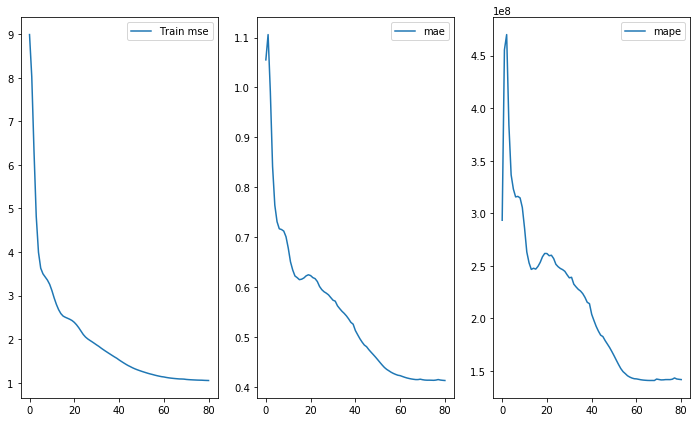

In [96]:
show_results(model, history);

In [87]:
# x_test = sales_df.iloc[[3,7,15,22],206:306]
# x_test = np.array(x_test)
# x_test = x_test.reshape(1, x_test.shape[1], x_test.shape[0])
# x_test

# y_test = np.array(sales_df.iloc[[3,7,15,22],306:308])
# y_test = y_test.reshape(1, y_test.shape[0] * y_test.shape[1])
# y_test

In [123]:
score = model.evaluate(x_test,
                       y_test[:,:,0],
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

3/3 [==============================] - 0s 14ms/step
Test score: 0.0061720008961856365
Test accuracy: 0.0061720008961856365
[0.0061720008961856365, 0.0061720008961856365, 0.04300376772880554, 22175574.0]


In [124]:
model.predict(x_test)

array([[ 0.06299265, -0.0007686 ,  0.05053152, ..., -0.0212761 ,
        -0.0257461 , -0.02865182],
       [ 0.03045742,  0.0289046 ,  0.03326583, ..., -0.01224186,
        -0.02119138, -0.04227221],
       [ 0.04924223,  0.02217067,  0.05682202, ..., -0.03752363,
        -0.02548404, -0.0028564 ]], dtype=float32)

In [149]:
# scaler.inverse_transform(y_test[:,:,-1])
y_test[:,:,-1].shape
# scaler.get_params

(3, 1000, 28)

In [67]:
# prediction engine for future
# copy the x_test array to be used for future looking predictions
x_test_latest = np.array(x_test, copy = True) 

# capture the shape of the x_test array to be used in loops
num_y_vals = x_test.shape[1]

# loop through 28 days of predictions and split into individual days to make restacking easier
for j in range(0, 29):
    x_test_array_split = []
    for i in range(1, num_y_vals + 1):
        if i >= num_y_vals:
            print("last prediction {} for {} run".format(i,j))
            x_test_array_split.append(model.predict(x_test_latest))
        else:
            x_test_array_split.append(x_test_latest[:,i,:])
    x_test_latest = np.stack(x_test_array_split, axis = 1)

last prediction 100 for 0 run
last prediction 100 for 1 run
last prediction 100 for 2 run
last prediction 100 for 3 run
last prediction 100 for 4 run
last prediction 100 for 5 run
last prediction 100 for 6 run
last prediction 100 for 7 run
last prediction 100 for 8 run
last prediction 100 for 9 run
last prediction 100 for 10 run
last prediction 100 for 11 run
last prediction 100 for 12 run
last prediction 100 for 13 run
last prediction 100 for 14 run
last prediction 100 for 15 run
last prediction 100 for 16 run
last prediction 100 for 17 run
last prediction 100 for 18 run
last prediction 100 for 19 run
last prediction 100 for 20 run
last prediction 100 for 21 run
last prediction 100 for 22 run
last prediction 100 for 23 run
last prediction 100 for 24 run
last prediction 100 for 25 run
last prediction 100 for 26 run
last prediction 100 for 27 run
last prediction 100 for 28 run


In [135]:
x_test_latest.shape

(3, 100, 1000)

In [133]:
y_test_predictions = np.transpose(x_test_latest[:,-29:-1,:], (0,2,1))

In [134]:
y_test_predictions.shape

(3, 1000, 28)

In [161]:
# get only last sample for the latest predictions
y_test[-1,:,:]

array([[ 0,  0,  0, ...,  2,  9,  8],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  2, ...,  1,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 7, 10,  9, ...,  0, 33, 32],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [70]:
y_test.shape

(3, 1000, 28)

In [71]:
(np.square(y_test_predictions - y_test)).mean(axis=None)

15.800670769198565

In [136]:
x_test_latest[:,-1,:]

array([[ 2.80064821,  1.54865956,  3.31406593,  2.25108767],
       [ 2.06400418, -0.61296386,  4.54324722,  4.46978474]])